### Pitfalls of RAG.
* Limited Contextual understanding
* They retrieve doucments solely based on keyword matching.
* Qulaity and relevance of the retrived docs is firly poor. RAG does not rank the docs.
* Poor Integration between retrieval and generation.
* The LLMs can ignore the docs provided by RAG.
* Naive RAGS suffer in large dataset. That is because of slower retrieval and inadequate indexing of the large dataset.
* They lack robustness. They lack the ability to handle complex queries or ambiguous queries robustly.
* They are inadaptable.

### Advanced RAG
* Enhanced RAG RETRIEVAL.
* Pre-Retrieval:
    * Improving the indexing structure. and user's query.
    * Improving data details, adding extra information
* post- Retrievl:
    * Combine pre-retrieval data with the original query.
        * Re ranking to highlight important information.

### Some Advanced RAG TECHNIQUES
* Query Expansion:
    * Generate potential answers to the query [using an LLM] and to get relevant context.
        * In this: You first pass the original query to the LLM.. let it generate an answer_1.
        * Next concatenate the query and the answer_1, into the vector database and again generate the Query_Result. 
        * Pass that into an LLM. Generate and answer.
    * Use Cases (with generated answers):
        * Information Retrieval
        * Question Answering Systems
        * E Commerce Search
        * Academic Research

| Stage | Component | Description | Tools/Options |
|-------|-----------|-------------|---------------|
| **A** | **PDF Files** | Input documents | Raw PDF documents |
| **B** | **Advanced Parser** | Extract and parse content from PDFs | LlamaParse, PyMuPDF |
| **C** | **Chunking & Metadata** | Split content into manageable chunks with metadata | LlamaIndex, LangChain |
| **D** | **Embeddings** | Convert text chunks into vector representations | OpenAI, HuggingFace, InstructorXL |
| **E** | **Vector Database** | Store and index embeddings for similarity search | Chroma, Pinecone, FAISS |
| **F** | **LLM Response** | Generate answers using retrieved context | Any LLM with retrieved context |

## Pipeline Flow
```
PDF Files → Advanced Parser → Chunking & Metadata → Embeddings → Vector DB → LLM Response
```

| Scenario                                       | Recommended Stack                          |
| ---------------------------------------------- | ------------------------------------------ |
| You want **high accuracy parsing with layout** | `PyMuPDF` or `Unstructured.io`             |
| You want **fully managed RAG pipeline**        | `LlamaParse + LlamaIndex`                  |
| You have **academic/research papers**          | `Grobid + LangChain`                       |
| You want **minimal code, fast RAG MVP**        | `Embedchain` or `RAGatouille`              |
| You have **scanned documents**                 | `PyMuPDF` + `Tesseract OCR` + `LayoutLMv3` |


| Library                                                                                              | Strengths                                   | Best For                                               |
| ---------------------------------------------------------------------------------------------------- | ------------------------------------------- | ------------------------------------------------------ |
| **[PyMuPDF (`fitz`)](https://pymupdf.readthedocs.io/)**                                              | Fast, supports images, fonts, layout info   | Structured parsing, extracting text **with layout**    |
| **[pdfminer.six](https://github.com/pdfminer/pdfminer.six)**                                         | Fine-grained layout, text positioning       | Table & figure-aware parsing, **OCR fallback**         |
| **[Grobid](https://github.com/kermitt2/grobid)**                                                     | ML-powered, structured data extraction      | Research papers, metadata extraction (titles, authors) |
| **[LlamaParse (by LlamaIndex)](https://docs.llamaindex.ai/en/stable/examples/parser/llamaparse/)**   | Hosted API, uses layout + ML                | RAG pipelines (best for LLMs), **zero setup**          |
| **[Unstructured.io](https://github.com/Unstructured-IO/unstructured)**                               | Parses HTML, PDFs, images, etc. into chunks | **General unstructured doc to structured JSON**        |
| **[OCR + LayoutLMv3 (Hugging Face)](https://huggingface.co/docs/transformers/model_doc/layoutlmv3)** | Use for scanned PDFs or visual layouts      | Forms, invoices, scanned docs                          |


# Advanced Agentic RAG Pipeline

## Core RAG Components
| Stage | Component | Description | Tools/Options |
|-------|-----------|-------------|---------------|
| **A** | **Document Ingestion** | Multi-format document input | PDF, DOCX, HTML, Web scraping |
| **B** | **Intelligent Parser** | Context-aware parsing with metadata extraction | LlamaParse, Unstructured.io, PyMuPDF |
| **C** | **Adaptive Chunking** | Dynamic chunking based on document structure | LlamaIndex, LangChain, Semantic chunking |
| **D** | **Multi-Modal Embeddings** | Text + image embeddings with metadata | OpenAI, Cohere, BGE, InstructorXL |
| **E** | **Hybrid Vector Store** | Vector + keyword + graph storage | Pinecone, Weaviate, Qdrant, Neo4j |

## Agentic AI Layer
| Stage | Agent Component | Description | Implementation |
|-------|-----------------|-------------|----------------|
| **F** | **Query Router** | Intelligently routes queries to appropriate retrievers | LangGraph, CrewAI, AutoGen |
| **G** | **Multi-Agent Retriever** | Specialized agents for different retrieval strategies | Dense, sparse, hybrid, reranking agents |
| **H** | **Context Synthesizer** | Combines and validates retrieved information | Cross-referencing and fact-checking agents |
| **I** | **Response Orchestrator** | Plans and executes multi-step reasoning | Tool-calling agents with memory |
| **J** | **Quality Assurance** | Validates and improves responses | Self-reflection and critique agents |

## Advanced Features
| Feature | Component | Description | Tools |
|---------|-----------|-------------|-------|
| **Memory** | **Conversation Memory** | Maintains context across interactions | LangGraph StateGraph, Redis |
| **Planning** | **Task Decomposer** | Breaks complex queries into subtasks | ReAct, Plan-and-Execute patterns |
| **Tools** | **Function Calling** | Accesses external APIs and databases | OpenAI Functions, LangChain Tools |
| **Feedback** | **Learning Loop** | Improves based on user feedback | RLHF, preference learning |

## Pipeline Flow
```
Documents → Intelligent Parser → Adaptive Chunking → Multi-Modal Embeddings → Hybrid Vector Store
                                                                                      ↓
User Query → Query Router → Multi-Agent Retriever → Context Synthesizer → Response Orchestrator → Quality Assurance → Final Response
                ↑                                                                                           ↓
            Memory & Planning ←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←← Feedback Loop
```

## Key Agentic Frameworks
- **LangGraph**: State-based agent orchestration
- **CrewAI**: Multi-agent collaboration framework  
- **AutoGen**: Conversational multi-agent system
- **LlamaIndex Agents**: Document-focused agent tools
- **Haystack Agents**: Production-ready agent pipelines

## Lets GO Hands-On

*heads up: we will be working on the microsoft annual report [85 pages]*

In [5]:
! pip install chromadb pypdf ollama

In [4]:
! pip install helper-utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for helper-utils: filename=helper_utils-0.0.8-py3-none-any.whl size=6087 sha256=a88f0e1aa7ea2189ab7f6c9a5270c5f8b6a334434e7786f8c3ab390e10e0886a
  Stored in directory: c:\users\think\appdata\local\pip\cache\wheels\0d\c9\0b\294fee31b3dc5173031699ea99432767ec851eef54c1982dd0
Successfully built helper-utils


In [6]:
from pypdf import PdfReader
import os
from dotenv import load_dotenv

In [7]:
# extract the Text from pdfs 
# using pyPdf library
def extract_text_from_pdfs(pdf_folder):
    pdf_texts= []
    for filename in os.listdir(pdf_folder):
        pdf_path= os.path.join(pdf_folder, filename)
        if filename.endswith('.pdf'):
            reader= PdfReader(pdf_path)
            text=''
            for page in reader.pages:
                text+=page.extract_text().strip()
            pdf_texts.append(text.strip()) # remove training whitespaces
    return pdf_texts
        

In [8]:
extracted_text= extract_text_from_pdfs('pdfs')

Recursive Text Splitter: 
* The default list is ["\n\n", "\n", " ", ""]. It seperates on this list.
* How the text is split: `by list of characters.`
* How the chunk size is measured: `by number of characters.`
* To use this you first create a langchain document of your pdf/docx.
* You can also change or update your seperator list.
```
text_splitter = RecursiveCharacterTextSplitter(
    separators=[
        "\n\n",
        "\n",
        " ",
        ".",
        ",",
        "\u200b",  # Zero-width space
        "\uff0c",  # Fullwidth comma
        "\u3001",  # Ideographic comma
        "\uff0e",  # Fullwidth full stop
        "\u3002",  # Ideographic full stop
        "",
    ],
    # Existing args
)
```
* For more reference visit: https://python.langchain.com/docs/how_to/recursive_text_splitter/

In [9]:
extracted_text= '\n'.join(extracted_text)

| Feature / Question                                 | `RecursiveCharacterTextSplitter`                                  | `SentenceTransformersTokenTextSplitter`                       |
| -------------------------------------------------- | ----------------------------------------------------------------- | ------------------------------------------------------------- |
| **Splits by**                                      | Number of **characters**                                          | Number of **tokens**                                          |
| **Tokenizer-aware?**                               | ❌ No                                                              | ✅ Yes (uses `sentence-transformers` tokenizers)               |
| **Preserves sentence structure?**                  | ❌ May break sentences                                             | ✅ Tries to preserve full sentences                            |
| **Best use case**                                  | Fast, simple chunking; pre-token split                            | High-quality RAG, embedding models (like MiniLM, BGE, OpenAI) |
| **When to use alone**                              | On small texts, for quick prototyping                             | When texts are small or already cleaned                       |
| **When to combine both**                           | For huge/unstructured docs → rough cut (char) → fine cut (tokens) | After initial char-splitting for large inputs                 |
| **Required to use both?**                          | ❌ No, optional                                                    | ❌ No, optional                                                |
| **Does it handle token limits (e.g., 512, 1000)?** | ❌ No                                                              | ✅ Yes                                                         |
| **Performance on large files**                     | ⚠️ Slower on huge files if not split beforehand                   | ✅ More efficient when pre-split                               |


| Situation                        | What to Use                                    |
| -------------------------------- | ---------------------------------------------- |
| Small/medium PDFs or clean text  | ✅ Only `SentenceTransformersTokenTextSplitter` |
| Large, messy, or scanned PDFs    | ✅ First character split, then token split      |
| Prioritizing speed over accuracy | ✅ Only character splitter                      |
| High accuracy, token-aware RAG   | ✅ Only token splitter or both if needed        |


## Step-by-Step Example
Let’s take a sample paragraph:
```
paragraph = """
Artificial intelligence is transforming industries. From healthcare to finance, the applications are endless.
However, managing large documents and ensuring relevant retrieval remains a challenge.
This is where retrieval augmented generation (RAG) comes into play.
"""
```
### Character Split (RecursiveCharacterTextSplitter):

* Roughly splits based on every N characters
* You might get something like:
```
["Artificial intelligence is transforming industries. From healthcare to finance, the applications are end",
"lications are endless. However, managing large documents and ensuring relevant retrieval remains a chall",
"llenge. This is where retrieval augmented generation (RAG) comes into play."]
```

👎 Issues:

* Sentences are broken mid-way
* Not token/model aware

### Token Split (SentenceTransformersTokenTextSplitter):
```
# More intelligent splits:
["Artificial intelligence is transforming industries.",
"From healthcare to finance, the applications are endless.",
"However, managing large documents and ensuring relevant retrieval remains a challenge.",
"This is where retrieval augmented generation (RAG) comes into play."]
```

👍 Benefits:

* Each chunk is semantically meaningful.
* Aligns with transformer token limits (important for embeddings & prompts).
* Less hallucination risk during retrieval or summarization.

In [10]:
# split the texts into chunks.
# using langchain

from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
    SentenceTransformersTokenTextSplitter)

# the RecursiveCharacterTextSplitter expects a string.
def split_text_into_chunks(extracted_text):
    character_text_splitter=RecursiveCharacterTextSplitter(
        chunk_size=1000, 
        chunk_overlap=20, 
        length_function=len # Function determining the chunk size
    )
    character_split_texts= character_text_splitter.split_text(extracted_text)
    return character_split_texts  


In [11]:
character_by_character_split_texts= split_text_into_chunks(extracted_text)

In [12]:
len(character_by_character_split_texts)

302

In [13]:
character_by_character_split_texts[0:2]

['1 \nDear shareholders, colleagues, customers, and partners,  \nWe are living through a time of historic challenge and opportunity. As I write this, the world faces ongoing economic, social, \nand geopolitical volatility. At the same time, we have entered a new age of AI that will fundamentally transform productivity \nfor every individual, organization, and industry on earth, and help us address some of our most pressing challenges.  \nThis next generation of AI will reshape every software category and every business, including our own. Forty -eight years \nafter its founding, Microsoft remains a consequential company because time and time again —from PC/Server, to \nWeb/Internet, to Cloud/Mobile—we have adapted to technological paradigm shifts. Today, we are doing so once again, as \nwe lead this new era.  \nAmid this transformation, our mission to empower every person and every organization on the planet to achieve',
 'more remains constant. As a company, we believe we can be the d

In [14]:
def split_into_tokens(character_by_character_split_texts):
    """Splits the text into tokens which the LLMs can understand.
   Like subwords."""
    token_split_text=[]
    # define our splitter
    token_splitter= SentenceTransformersTokenTextSplitter(
    tokens_per_chunk=250, # for llm's token limit account
    chunk_overlap=20
    )
    for text in character_by_character_split_texts:
        token_split_text.extend(token_splitter.split_text(text))
        
    return token_split_text

In [15]:
# split the text into token chunks
token_split_texts= split_into_tokens(character_by_character_split_texts)

In [16]:
len(token_split_texts)
# this is more than the character split texts
# because the token split is more granular.

311

In [17]:
# lets build our embedding model and push in vector db
from sentence_transformers import SentenceTransformer
def build_embedding_model():
    model_name= 'sentence-transformers/all-MiniLM-L6-v2'
    model= SentenceTransformer(model_name)
    return model

If token_split_texts is a list like:

`token_split_texts = ["chunk 1 text...", "chunk 2 text...", "chunk 3 text..."]`

Then calling .encode(token_split_texts) will return:

```
[
  [0.123, 0.456, ...],  # embedding for chunk 1
  [0.789, 0.321, ...],  # embedding for chunk 2
  ...
]
```

🔍 How Many Rows Are Created in ChromaDB?
Answer:
➡️ One row per chunk, not per full document.

So if your token_split_texts contains 53 chunks, you'll store 53 rows in ChromaDB, each with:

* A chunk of text
* Its embedding
* A unique ID
* Metadata (like source)

🧭 ChromaDB Structure (Diagram)
| ID   | Document (Chunk Text)       | Embedding    | Metadata                     |
|------|-----------------------------|--------------|------------------------------|
| "0"  | "Artificial intell..."      | [0.12, ...]  | {"source": "microsoft_pdf"}   |
| "1"  | "From healthcare..."        | [0.34, ...]  | {"source": "microsoft_pdf"}   |
| "2"  | "However, managing..."      | [0.98, ...]  | {"source": "microsoft_pdf"}   |
| ...  | ...                         | ...          | ...                           |
Each row = 1 chunk = 1 embedding = 1 retrievable item in RAG

In [18]:
# build and store embeddings
import chromadb
def build_embedding_and_store_in_vector_db(token_split_texts):
    # get the embedding model
    embedding_model= build_embedding_model()

    # create the chroma Client
    client=chromadb.PersistentClient(
        path="microsoft_pdf_embeddings", # folder for db
    )

    # create the collection
    collection= client.get_or_create_collection(
        name="microsoft_collection",     # name of the collection
    )

    # get the embedding of each chunk
    embeddings = embedding_model.encode(token_split_texts)
    
    # add the embeddings to the collection
    collection.add(
        documents= token_split_texts,  # the texts to be added
        ids= [str(i) for i in range (len(token_split_texts))],  # unique ids for each text
        embeddings= embeddings,  # the embeddings of the texts
        metadatas= [{"source": "microsoft_pdf"}] * len(token_split_texts)  # metadata for each text
    )
    return collection

In [19]:
collection= build_embedding_and_store_in_vector_db(token_split_texts)

In [20]:
count= collection.count()

In [42]:
count

311

In [21]:
query="What was the total revenue for the year?"

### Hypothetical Document Embeddings.
* Ask an LLM to hallucinate over a query.
* Take that query + hallucinated answer and get relevant texts from the collection.
* You can then feed this entire thing into the llm to give you a perfect response. [OPTIONAL]

In [22]:
! pip install ollama

In [23]:
import ollama
def get_hallucinated_query_response(query, model_name='gemma3n:latest'):

    prompt = f"""
    You are a helpful expert financial research assisttant.
    Provide an example answer to the given question, that might be found in a document like an annual report.


Question:
{query}

Answer:"""

    try:
        response = ollama.chat(
            model=model_name,
            messages=[
                {
                    'role': 'user',
                    'content': prompt,
                }
            ],
            options={
                'temperature': 0.6, #[ closer to 0: Deterministic]
                'max_tokens': 200,  # length of response
                'top_p': 0.8, # Filters the model's vocabulary to the top probable tokens.
            }                 # Range: 0.1 (strict) to 1.0 (broad).
        )
        return response['message']['content']
    except Exception as e:
        return f"Error generating response: {str(e)}"


In [24]:
llm_hallucinated_response= get_hallucinated_query_response(query)

In [25]:
llm_hallucinated_response

"**Total revenue for the year ended December 31, 2023, was $125.7 million. This represents a 5.2% increase compared to $119.3 million in 2022. The growth was primarily driven by increased sales in our core product lines and expansion into the [mention a specific new market or product area, if applicable].**\n\n\n\n**Explanation of why this is a good answer for an annual report:**\n\n*   **Directly answers the question:** It clearly states the total revenue figure.\n*   **Specifies the period:**  It includes the date the revenue covers (year ended December 31, 2023). This is crucial for clarity.\n*   **Provides context:** It includes a year-over-year comparison, showing the growth or decline.  This is important for investors to understand the company's performance trend.\n*   **Highlights key drivers:** It briefly explains *why* the revenue changed, pointing to specific factors like product line performance or market expansion. This adds valuable insight.\n*   **Uses professional langua

Next pass this joint answer: query+ response into the LLM

In [38]:
joint_query= f"{query} {llm_hallucinated_response}"

In [46]:
def get_jointQuery_responses(llm_hallucinated_response,query, collection):
    # in chroma you dont need to build the embedding for the query
    joint_query = f"{query} {llm_hallucinated_response}"
    
    results= collection.query(
        query_texts=[llm_hallucinated_response],  # the query text
        n_results=5,
        include=["documents", "embeddings"]  # what to include in the results
    )
    return results

In [47]:
joint_query_retrieval_answer= get_jointQuery_responses(llm_hallucinated_response, query, collection)

In [48]:
joint_query_retrieval_answer

{'ids': [['136', '121', '120', '186', '127']],
 'embeddings': [array([[ 0.00314847, -0.0564224 ,  0.03329218, ..., -0.11772352,
          -0.0172887 ,  0.05966147],
         [-0.02402674, -0.06448872, -0.01477951, ..., -0.06723693,
          -0.00935987, -0.01644639],
         [ 0.02184383, -0.03202321, -0.05222332, ..., -0.08729147,
          -0.02081233, -0.00172158],
         [ 0.00563767, -0.00375291,  0.03884898, ..., -0.0891605 ,
          -0.04481906, -0.0374296 ],
         [ 0.01764905, -0.03460781,  0.02327529, ..., -0.14289753,
           0.02588371, -0.01848453]])],
 'documents': [['fiscal year 2023 compared with fiscal year 2022 research and development expenses increased $ 2. 7 billion or 11 % driven by investments in cloud engineering and linkedin. sales and marketing ( in millions, except percentages ) 2023 2022 percentage change sales and marketing $ 22, 759 $ 21, 825 4 % as a percent of revenue 11 % 11 % 0ppt sales and marketing expenses include payroll, employee benef

In [29]:
! pip install umap-learn

Now since the embeddings are high dimensionality vectors. And to visualize them we will be using UMAP.

In [49]:
embeddings = collection.get(include=["embeddings"])["embeddings"]

In [31]:
embeddings

array([[-4.48643304e-02, -2.65765302e-02,  5.08678444e-02, ...,
        -3.12455930e-02, -2.34171394e-02, -5.24429269e-02],
       [-9.82296467e-02, -6.92604622e-03, -1.80437695e-03, ...,
        -9.67107937e-02,  4.92179208e-02,  2.39097187e-03],
       [-2.78818402e-02, -4.32330444e-02,  1.78645190e-03, ...,
        -9.36608389e-02,  7.30100870e-02, -3.61429714e-02],
       ...,
       [-4.16572243e-02, -3.62805836e-02,  4.20238674e-02, ...,
        -6.94045499e-02, -6.69304579e-02, -9.39283520e-03],
       [-9.90765548e-05, -1.64379608e-02,  2.47890744e-02, ...,
        -3.96450311e-02, -4.84677218e-02,  6.33781170e-03],
       [-9.09882039e-03,  1.83823369e-02, -2.10490432e-02, ...,
         7.12936511e-03, -2.07488686e-02, -5.88578507e-02]])

```
[
  [0.11, 0.98, ..., 0.21],  # Embedding for chunk 0
  [0.10, 0.97, ..., 0.25],  # Embedding for chunk 1
  ...
]
```

In [32]:
import umap.umap_ as umap

* umap.UMAP(...) initializes the dimensionality reduction algorithm.
    * random_state=0 ensures reproducibility.
    * transform_seed=0 ensures consistent transforms for new points.
* .fit(embeddings) learns a 2D map from high-dimensional vectors.
* umap_transform now holds a trained projection model to map embeddings → 2D space.

In [44]:
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

c:\Users\think\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
projected_dataset_embeddings = umap_transform.transform(embeddings)

projected_dataset_embeddings is now:
```
[
  [1.02, 4.33],   # 2D X,Y position of chunk 0
  [1.55, 4.10],   # 2D position of chunk 1
  ...
]
```

In [50]:
model= build_embedding_model()
retrieved_embeddings = joint_query_retrieval_answer["embeddings"][0]
original_query_embedding = model.encode([query])
augmented_query_embedding = model.encode([joint_query])


In [ ]:
projected_original_query_embedding = umap_transform.transform(original_query_embedding)
projected_augmented_query_embedding = umap_transform.transform(augmented_query_embedding)
projected_retrieved_embeddings = umap_transform.transform(retrieved_embeddings)

| Variable                        | What it contains                          | Purpose                                   |
|---------------------------------|------------------------------------------|-------------------------------------------|
| `embeddings`                    | All document chunk embeddings (384D)      | Raw data                                  |
| `umap_transform`                | 2D projection model from UMAP            | To reduce dimensions                      |
| `projected_dataset_embeddings`  | All chunks in 2D space                   | For gray scatter plot                     |
| `retrieved_embeddings`          | Top-5 matched doc embeddings             | Green circles in visualization            |
| `original_query_embedding`      | Embedding of user's query                | Red "X" marker in plot                    |
| `augmented_query_embedding`     | Embedding of HyDE query                  | Orange "X" marker in plot                 |
| `project_embeddings(...)`       | Applies `umap_transform` to map to 2D    | Used for visualization                    |

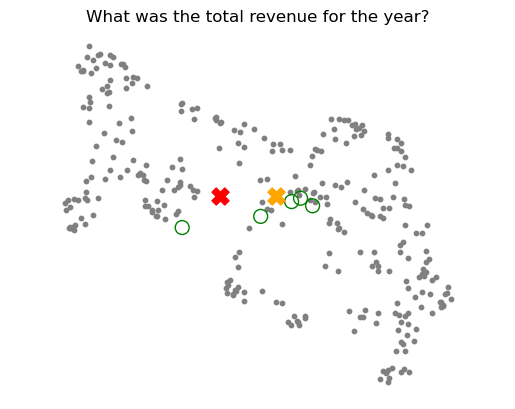

In [53]:
import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()

plt.scatter(
    projected_dataset_embeddings[:, 0],
    projected_dataset_embeddings[:, 1],
    s=10,
    color="gray",
)
plt.scatter(
    projected_retrieved_embeddings[:, 0],
    projected_retrieved_embeddings[:, 1],
    s=100,
    facecolors="none",
    edgecolors="g",
)
plt.scatter(
    projected_original_query_embedding[:, 0],
    projected_original_query_embedding[:, 1],
    s=150,
    marker="X",
    color="r",
)
plt.scatter(
    projected_augmented_query_embedding[:, 0],
    projected_augmented_query_embedding[:, 1],
    s=150,
    marker="X",
    color="orange",
)

plt.gca().set_aspect("equal", "datalim")
plt.title(f"{query}")
plt.axis("off")
plt.show()  # display the plot